
# Montar Google Drive en Colab y cargar los archivos CSV

In [1]:
from google.colab import drive
import pandas as pd

# Montar Google Drive en Colab y cargar el archivo CSV.
drive.mount('/content/drive')

file_path_1 = '/content/drive/My Drive/Colab Notebooks/1-poblacion.csv'
df_1 = pd.read_csv(file_path_1, sep=';', encoding='utf-8')
# Para clusterizar excluyendo municipios con más de 35.000 habitantes.
df_1_1 = pd.read_csv(file_path_1, sep=';', encoding='utf-8')

file_path_2 = '/content/drive/My Drive/Colab Notebooks/2-densidad.csv'
df_2 = pd.read_csv(file_path_2, sep=';', encoding='utf-8')
df_2_1 = pd.read_csv(file_path_2, sep=';', encoding='utf-8')
# El archivo usaba comas como separador de decimales en lugar de puntos.
df_2['Valor_Agrupacion'] = df_2['Valor_Agrupacion'].str.replace(',', '.').astype(float)
df_2_1['Valor_Agrupacion'] = df_2_1['Valor_Agrupacion'].str.replace(',', '.').astype(float)

file_path_3 = '/content/drive/My Drive/Colab Notebooks/3-distancia-capital.csv'
df_3 = pd.read_csv(file_path_3, sep=';', encoding='utf-8')
df_3_1 = pd.read_csv(file_path_3, sep=';', encoding='utf-8')

file_path_4 = '/content/drive/My Drive/Colab Notebooks/4-zonas-estadisticas.csv'
df_4 = pd.read_csv(file_path_4, sep=';', encoding='ISO-8859-1')
df_4_1 = pd.read_csv(file_path_4, sep=';',  encoding='ISO-8859-1')


Mounted at /content/drive


# Análisis exploratorio de datos de "1-poblacion.csv"



#####################################################################
EDA 1-poblacion.csv
#####################################################################
Primeros registros

   Tipo_Agrupacion  ID_Agrupacion  Nombre_Agrupacion  Valor_Agrupacion
12      Municipios             14       Acebeda (La)                55
13      Municipios             29            Ajalvir              4793
14      Municipios             35  Alameda del Valle               248
15      Municipios             40         Alamo (El)              9946
16      Municipios             53  Alcalá de Henares            195570 

Número de entradas (no hay missing values)

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 12 to 190
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Tipo_Agrupacion    178 non-null    object
 1   ID_Agrupacion      178 non-null    int64 
 2   Nombre_Agrupacion  178 non-null    object
 3   Valor_Ag

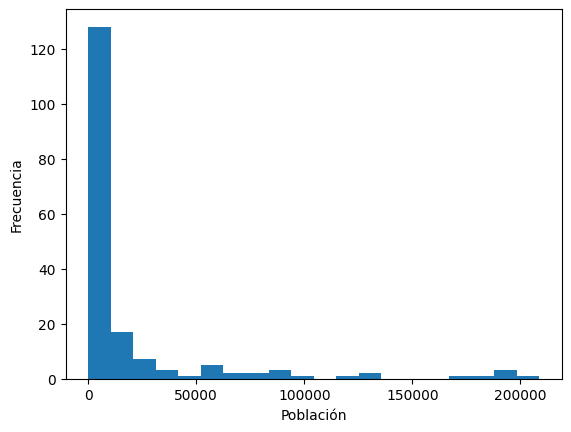


#####################################################################
EDA 1-poblacion.csv (excluyendo municipios de más de 35.000 habitantes)
#####################################################################
Primeros registros

   Tipo_Agrupacion  ID_Agrupacion  Nombre_Agrupacion  Valor_Agrupacion
12      Municipios             14       Acebeda (La)                55
13      Municipios             29            Ajalvir              4793
14      Municipios             35  Alameda del Valle               248
15      Municipios             40         Alamo (El)              9946
19      Municipios             88   Aldea del Fresno              3078 

Número de entradas (no hay missing values)

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 12 to 190
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Tipo_Agrupacion    154 non-null    object
 1   ID_Agrupacion      154 non-null    int64 
 2   No

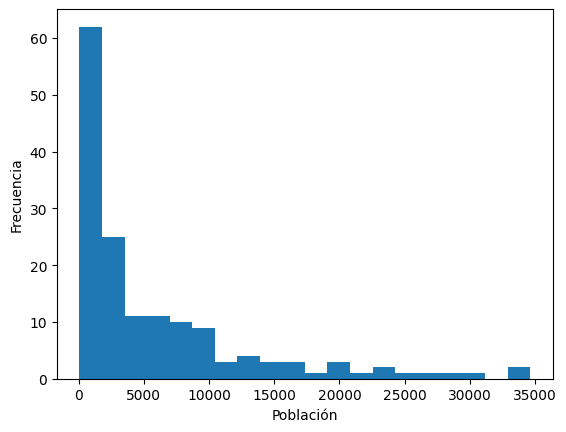

In [2]:
import matplotlib.pyplot as plt

def exploratory_analysis(df, max_population=0):
    municipios = []
    df = df[df['Tipo_Agrupacion'] == 'Municipios']
    df = df[df['Nombre_Agrupacion'] != 'Madrid']
    if max_population != 0:
        df = df[df['Valor_Agrupacion'] <= max_population]
        # Guardar el nombre de la lista de municipios que cumplen:
        municipios = df['Nombre_Agrupacion'].tolist()

    print("Primeros registros\n")
    print(df.head(), "\n")

    print("Número de entradas (no hay missing values)\n")
    print(df.info(), "\n")

    print("Estadísticas\n")
    print(df['Valor_Agrupacion'].describe().apply(lambda x: int(x)), "\n")

    print("Gráfico que muestra la distribución de población \n")
    df['Valor_Agrupacion'].plot(kind='hist', bins=20).set(xlabel='Población',
                                                            ylabel='Frecuencia')
    plt.show()

    return df, municipios

# Análisis exploratorio de datos de "1-poblacion.csv"
print("#####################################################################")
print("EDA 1-poblacion.csv")
print("#####################################################################")
df_1, _ = exploratory_analysis(df_1)

# Análisis exploratorio de datos de "1-poblacion.csv", excluyendo municipios de más de 35.000 habitantes
print("\n#####################################################################")
print("EDA 1-poblacion.csv (excluyendo municipios de más de 35.000 habitantes)")
print("#####################################################################")
df_1_1, municipios = exploratory_analysis(df_1_1, max_population=35000)

# Clusterización de "1-poblacion.csv"

#####################################################################
Clusterización de 1-poblacion.csv (3 clústeres)
#####################################################################
Método del codo para elegir el número óptimo de clusters 



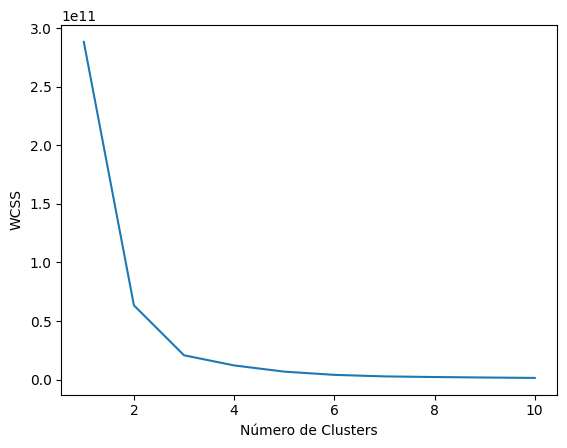


 Clusterización de municipios por número de habitantes 



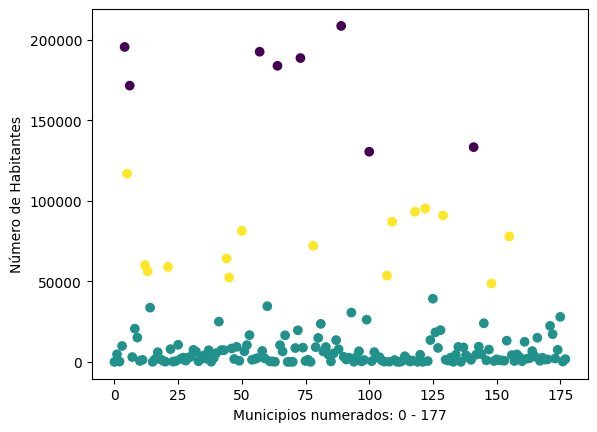


Cluster 0:
Límite inferior = 130550
Límite superior = 208632
Número de municipios = 8

Cluster 1:
Límite inferior = 55
Límite superior = 39286
Número de municipios = 155

Cluster 2:
Límite inferior = 48726
Límite superior = 116895
Número de municipios = 15

#####################################################################
Clusterización de 1-poblacion.csv (4 clústeres)
#####################################################################
Método del codo para elegir el número óptimo de clusters 



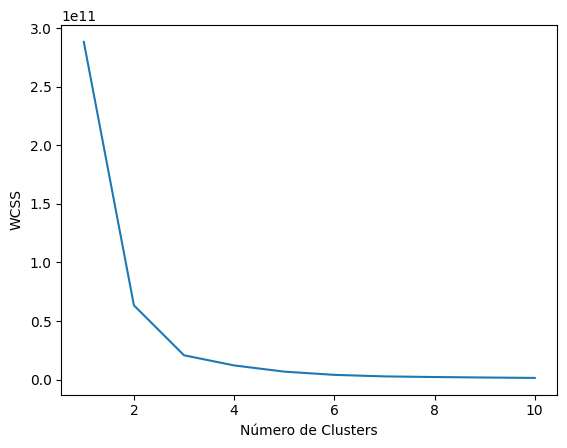


 Clusterización de municipios por número de habitantes 



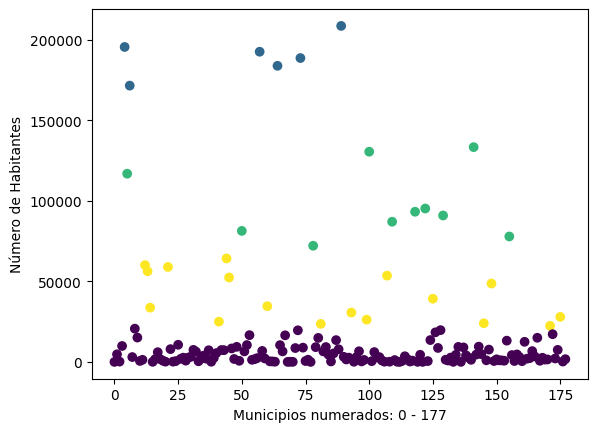


Cluster 0:
Límite inferior = 55
Límite superior = 20704
Número de municipios = 145

Cluster 1:
Límite inferior = 171575
Límite superior = 208632
Número de municipios = 6

Cluster 2:
Límite inferior = 72173
Límite superior = 133377
Número de municipios = 10

Cluster 3:
Límite inferior = 22453
Límite superior = 64297
Número de municipios = 17

#####################################################################
Clusterización de 1-poblacion.csv (3 clústeres), excluyendo municipios de más de 35.000 habitantes
#####################################################################
Método del codo para elegir el número óptimo de clusters 



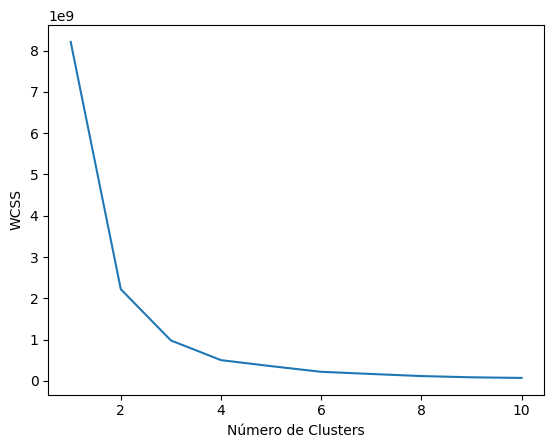


 Clusterización de municipios por número de habitantes 



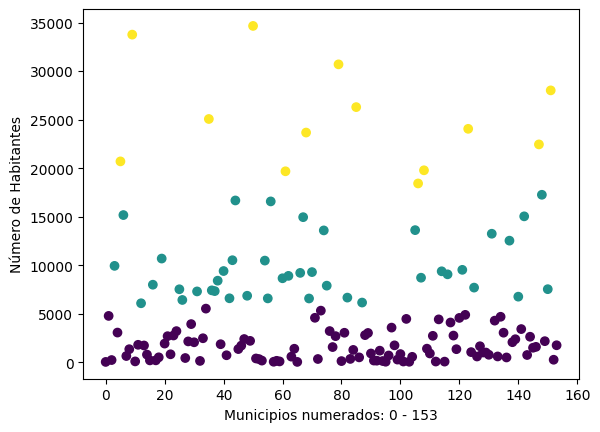


Cluster 0:
Límite inferior = 55
Límite superior = 5544
Número de municipios = 100

Cluster 1:
Límite inferior = 6096
Límite superior = 17266
Número de municipios = 41

Cluster 2:
Límite inferior = 18432
Límite superior = 34653
Número de municipios = 13

#####################################################################
Clusterización de 1-poblacion.csv (4 clústeres), excluyendo municipios de más de 35.000 habitantes
#####################################################################
Método del codo para elegir el número óptimo de clusters 



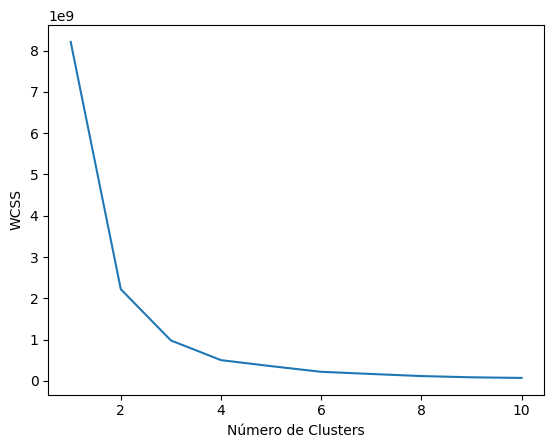


 Clusterización de municipios por número de habitantes 



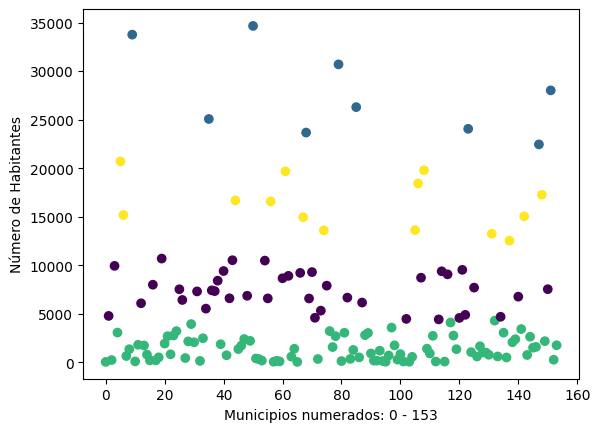


Cluster 0:
Límite inferior = 4436
Límite superior = 10699
Número de municipios = 40

Cluster 1:
Límite inferior = 22453
Límite superior = 34653
Número de municipios = 9

Cluster 2:
Límite inferior = 55
Límite superior = 4306
Número de municipios = 91

Cluster 3:
Límite inferior = 12542
Límite superior = 20704
Número de municipios = 14



In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

def cluster_analysis(df, n_clusters):
    # X = número de habitantes de un municipio.
    X = df[['Valor_Agrupacion']].values

    # Determinar el número óptimo de clusters usando el método del codo.
    # El número óptimo de clusters es el que hace que WCSS no disminuya
    # significativamente con cada cluster adicional.
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
        kmeans.fit(X)
        # La inercia mide cuán cerca cerca están los puntos de un mismo cluster.
        wcss.append(kmeans.inertia_)

    # Graficar el método del codo
    print("Método del codo para elegir el número óptimo de clusters \n")
    plt.plot(range(1, 11), wcss)
    plt.xlabel('Número de Clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Seleccionar el número de clusters, y crear
    # una columna "Cluster" para clasificar cada municipio.
    df['Cluster'] = KMeans(n_clusters=n_clusters, n_init=10, random_state=0).fit_predict(X)

    # Visualización de los clusters:
    print("\n Clusterización de municipios por número de habitantes \n")
    plt.scatter(range(len(df)), df['Valor_Agrupacion'], c=df['Cluster'],
                cmap='viridis')
    plt.xlabel('Municipios numerados: 0 - ' + str(len(df)-1))
    plt.ylabel('Número de Habitantes')
    plt.show()
    print("")

    # Calcular e imprimir información sobre los clusters.
    for i in range(n_clusters):
        cluster_data = df[df['Cluster'] == i]['Valor_Agrupacion']
        print(f"Cluster {i}:")
        print(f"Límite inferior = {np.min(cluster_data)}")
        print(f"Límite superior = {np.max(cluster_data)}")
        print(f"Número de municipios = {len(cluster_data)}")
        print("")

    return df

# Clusterización de "1-poblacion.csv" (3 clústeres)
print("#####################################################################")
print("Clusterización de 1-poblacion.csv (3 clústeres)")
print("#####################################################################")
df_poblacion_3 = cluster_analysis(df_1, 3)

# Clusterización de "1-poblacion.csv" (4 clústeres)
print("#####################################################################")
print("Clusterización de 1-poblacion.csv (4 clústeres)")
print("#####################################################################")
df_poblacion_4 = cluster_analysis(df_1, 4)

# Clusterización de "1-poblacion.csv" (3 clústeres), excluyendo municipios de más de 35.000 habitantes
print("#####################################################################")
print("Clusterización de 1-poblacion.csv (3 clústeres), excluyendo municipios de más de 35.000 habitantes")
print("#####################################################################")
df_poblacion_max35_3 = cluster_analysis(df_1_1, 3)

# Clusterización de "1-poblacion.csv" (4 clústeres), excluyendo municipios de más de 35.000 habitantes
print("#####################################################################")
print("Clusterización de 1-poblacion.csv (4 clústeres), excluyendo municipios de más de 35.000 habitantes")
print("#####################################################################")
df_poblacion_max35_4 = cluster_analysis(df_1_1, 4)

# Análisis exploratorio de datos de "2-densidad.csv"

#####################################################################
EDA 2-densidad.csv
#####################################################################
Primeros registros

   Tipo_Agrupacion  ID_Agrupacion  Nombre_Agrupacion  Valor_Agrupacion
12      Municipios             14       Acebeda (La)              3.06
13      Municipios             29            Ajalvir            246.21
14      Municipios             35  Alameda del Valle             10.68
15      Municipios             40         Alamo (El)            467.88
16      Municipios             53  Alcalá de Henares           2254.21 


Número de entradas (no hay missing values)

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 12 to 190
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tipo_Agrupacion    178 non-null    object 
 1   ID_Agrupacion      178 non-null    int64  
 2   Nombre_Agrupacion  178 non-null    object 
 3   Val

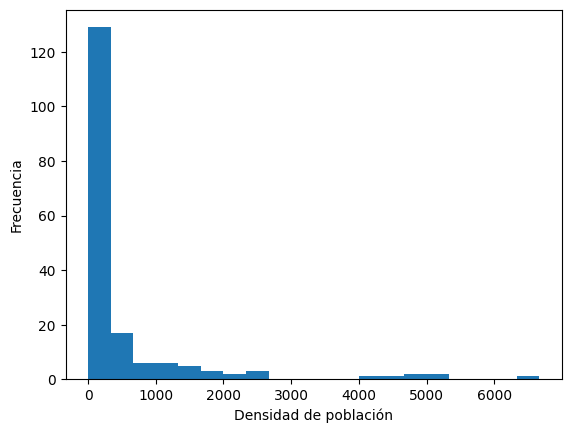


#####################################################################
EDA 2-densidad.csv (excluyendo municipios de más de 35.000 habitantes)
#####################################################################
Primeros registros

   Tipo_Agrupacion  ID_Agrupacion  Nombre_Agrupacion  Valor_Agrupacion
12      Municipios             14       Acebeda (La)              3.06
13      Municipios             29            Ajalvir            246.21
14      Municipios             35  Alameda del Valle             10.68
15      Municipios             40         Alamo (El)            467.88
19      Municipios             88   Aldea del Fresno             65.93 


Número de entradas (no hay missing values)

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 12 to 190
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tipo_Agrupacion    154 non-null    object 
 1   ID_Agrupacion      154 non-null    int64  
 2 

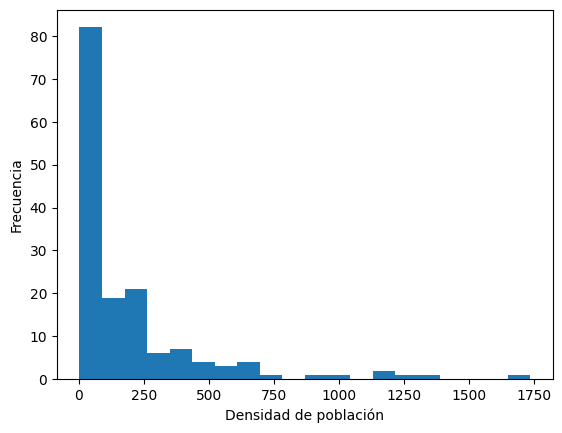

In [4]:
import matplotlib.pyplot as plt

def exploratory_analysis(df, municipios=None):
    df = df[df['Tipo_Agrupacion'] == 'Municipios']
    df = df[df['Nombre_Agrupacion'] != 'Madrid']
    if municipios is not None:
        df = df[df['Nombre_Agrupacion'].isin(municipios)]

    print("Primeros registros\n")
    print(df.head(), "\n\n")

    print("Número de entradas (no hay missing values)\n")
    print(df.info(), "\n\n")

    print("Estadísticas\n")
    print(df['Valor_Agrupacion'].describe(), "\n\n")

    print("Gráfico que muestra la distribución de población \n")
    df['Valor_Agrupacion'].plot(kind='hist', bins=20).set(xlabel='Densidad de población',
                                                            ylabel='Frecuencia')
    plt.show()

    return df

# Análisis exploratorio de datos de "2-densidad.csv"
print("#####################################################################")
print("EDA 2-densidad.csv")
print("#####################################################################")
df_2 = exploratory_analysis(df_2)

# Análisis exploratorio de datos de "2-densidad.csv", excluyendo municipios de menos de 10.000 habitantes
print("\n#####################################################################")
print("EDA 2-densidad.csv (excluyendo municipios de más de 35.000 habitantes)")
print("#####################################################################")
df_2_1 = exploratory_analysis(df_2_1, municipios)


# Clusterización de "2-densidad.csv"

#####################################################################
Clusterización de 2-densidad.csv (3 clústeres)
#####################################################################
Método del codo para elegir el número óptimo de clusters 



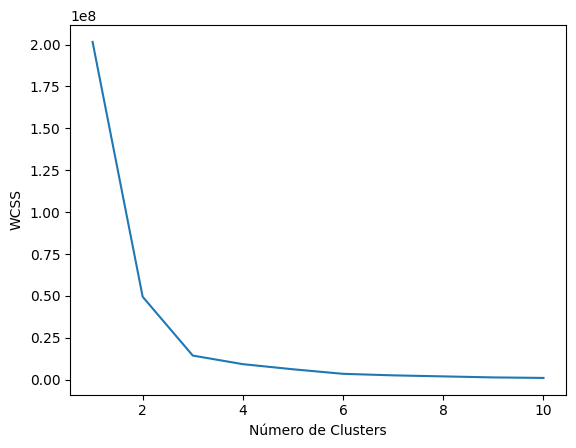


 Clusterización de municipios por densidad de población 



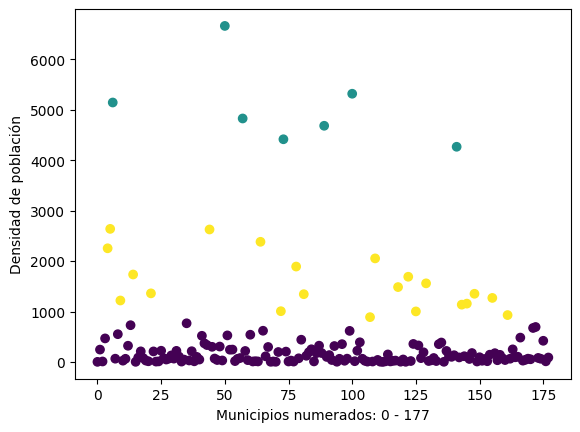


Cluster 0:
Límite inferior = 1.8
Límite superior = 767.6
Número de municipios = 150

Cluster 1:
Límite inferior = 4266.66
Límite superior = 6662.18
Número de municipios = 7

Cluster 2:
Límite inferior = 889.54
Límite superior = 2639.08
Número de municipios = 21

#####################################################################
Clusterización de 2-densidad.csv (4 clústeres)
#####################################################################
Método del codo para elegir el número óptimo de clusters 



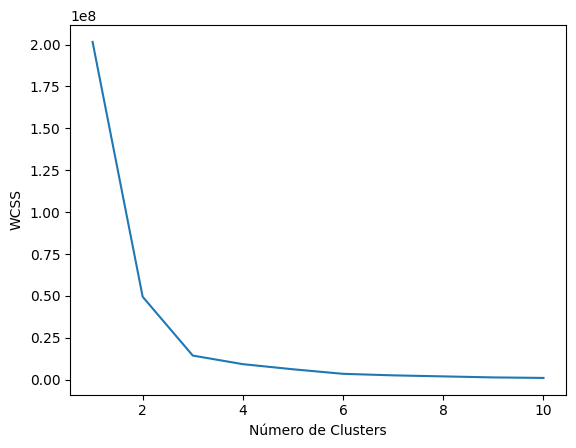


 Clusterización de municipios por densidad de población 



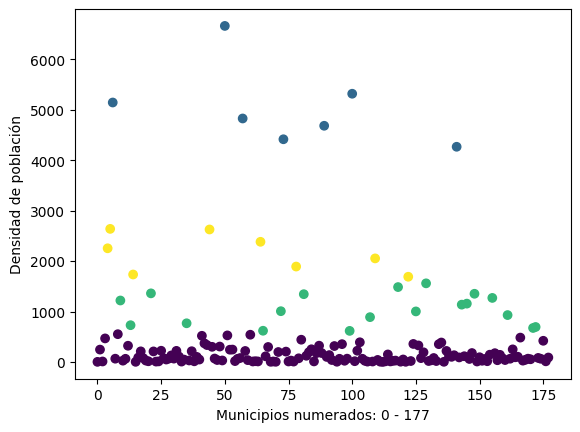


Cluster 0:
Límite inferior = 1.8
Límite superior = 551.67
Número de municipios = 144

Cluster 1:
Límite inferior = 4266.66
Límite superior = 6662.18
Número de municipios = 7

Cluster 2:
Límite inferior = 617.07
Límite superior = 1559.52
Número de municipios = 19

Cluster 3:
Límite inferior = 1690.16
Límite superior = 2639.08
Número de municipios = 8

#####################################################################
Clusterización de 2-densidad.csv (3 clústeres), excluyendo municipios de más de 35.000 habitantes
#####################################################################
Método del codo para elegir el número óptimo de clusters 



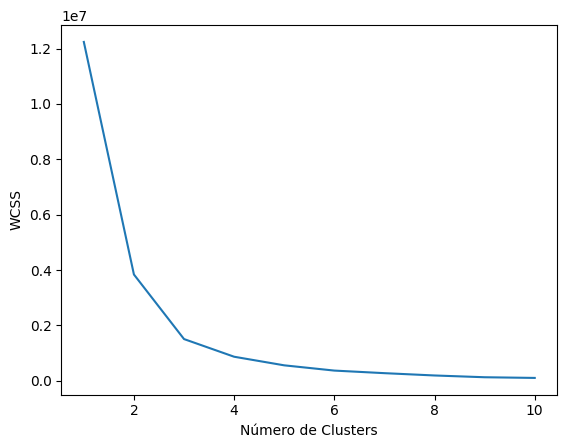


 Clusterización de municipios por densidad de población 



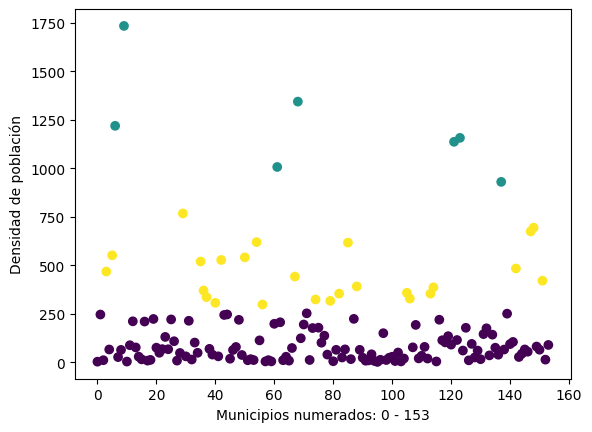


Cluster 0:
Límite inferior = 1.8
Límite superior = 252.45
Número de municipios = 122

Cluster 1:
Límite inferior = 930.46
Límite superior = 1734.84
Número de municipios = 7

Cluster 2:
Límite inferior = 298.02
Límite superior = 767.6
Número de municipios = 25

#####################################################################
Clusterización de 2-densidad.csv (4 clústeres), excluyendo municipios de más de 35.000 habitantes
#####################################################################
Método del codo para elegir el número óptimo de clusters 



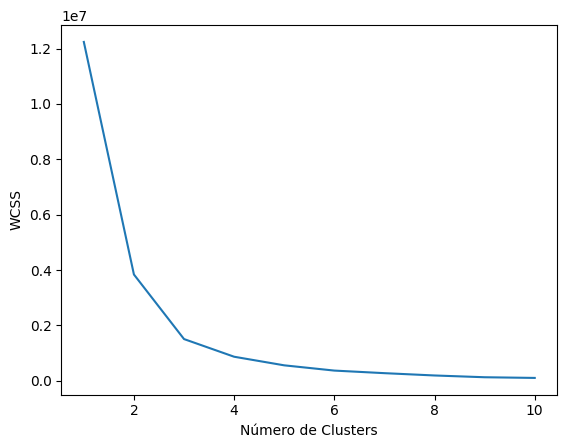


 Clusterización de municipios por densidad de población 



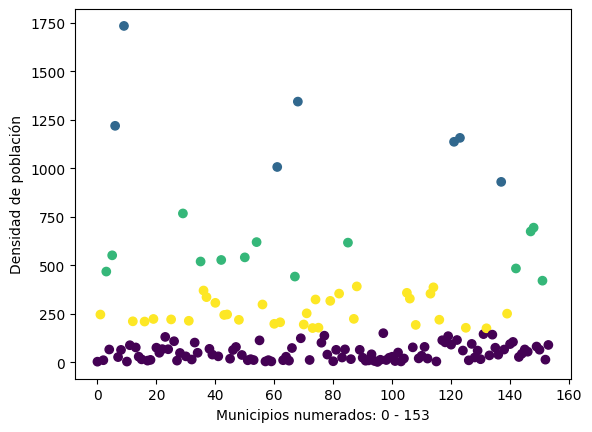


Cluster 0:
Límite inferior = 1.8
Límite superior = 150.04
Número de municipios = 101

Cluster 1:
Límite inferior = 930.46
Límite superior = 1734.84
Número de municipios = 7

Cluster 2:
Límite inferior = 420.84
Límite superior = 767.6
Número de municipios = 13

Cluster 3:
Límite inferior = 175.3
Límite superior = 391.28
Número de municipios = 33



In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

def cluster_analysis(df, n_clusters):
    # X = número de habitantes de un municipio.
    X = df[['Valor_Agrupacion']].values

    # Determinar el número óptimo de clusters usando el método del codo.
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Graficar el método del codo
    print("Método del codo para elegir el número óptimo de clusters \n")
    plt.plot(range(1, 11), wcss)
    plt.xlabel('Número de Clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Seleccionar el número de clusters, y crear
    # una columna "Cluster" para clasificar cada municipio.
    df['Cluster'] = KMeans(n_clusters=n_clusters, n_init=10, random_state=0).fit_predict(X)

    # Visualización de los clusters:
    print("\n Clusterización de municipios por densidad de población \n")
    plt.scatter(range(len(df)), df['Valor_Agrupacion'], c=df['Cluster'],
                cmap='viridis')
    plt.xlabel('Municipios numerados: 0 - ' + str(len(df)-1))
    plt.ylabel('Densidad de población')
    plt.show()
    print("")

    # Calcular e imprimir información sobre los clusters.
    for i in range(n_clusters):
        cluster_data = df[df['Cluster'] == i]['Valor_Agrupacion']
        print(f"Cluster {i}:")
        print(f"Límite inferior = {np.min(cluster_data)}")
        print(f"Límite superior = {np.max(cluster_data)}")
        print(f"Número de municipios = {len(cluster_data)}")
        print("")

    return df

# Clusterización de "2-densidad.csv" (3 clústeres)
print("#####################################################################")
print("Clusterización de 2-densidad.csv (3 clústeres)")
print("#####################################################################")
df_densidad_3 = cluster_analysis(df_2, 3)

# Clusterización de "2-densidad.csv" (4 clústeres)
print("#####################################################################")
print("Clusterización de 2-densidad.csv (4 clústeres)")
print("#####################################################################")
df_densidad_4 = cluster_analysis(df_2, 4)

# Clusterización de "2-densidad.csv" (3 clústeres), excluyendo municipios de más de 35.000 habitantes
print("#####################################################################")
print("Clusterización de 2-densidad.csv (3 clústeres), excluyendo municipios de más de 35.000 habitantes")
print("#####################################################################")
df_densidad_max35_3 = cluster_analysis(df_2_1, 3)

# Clusterización de "2-densidad.csv" (4 clústeres), excluyendo municipios de más de 35.000 habitantes
print("#####################################################################")
print("Clusterización de 2-densidad.csv (4 clústeres), excluyendo municipios de más de 35.000 habitantes")
print("#####################################################################")
df_densidad_max35_4 = cluster_analysis(df_2_1, 4)

# Análisis exploratorio de datos de "3-distancia-capital.csv"

#####################################################################
EDA 3-distancia-capital.csv
#####################################################################
Primeros registros

  Tipo_Agrupacion  ID_Agrupacion  Nombre_Agrupacion  Valor_Agrupacion
0      Municipios             14       Acebeda (La)            88.477
1      Municipios             29            Ajalvir            34.911
2      Municipios             35  Alameda del Valle            92.242
3      Municipios             40         Alamo (El)            42.104
4      Municipios             53  Alcalá de Henares            32.760 

Número de entradas (no hay missing values)

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 178
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tipo_Agrupacion    178 non-null    object 
 1   ID_Agrupacion      178 non-null    int64  
 2   Nombre_Agrupacion  178 non-null    object 
 3   Va

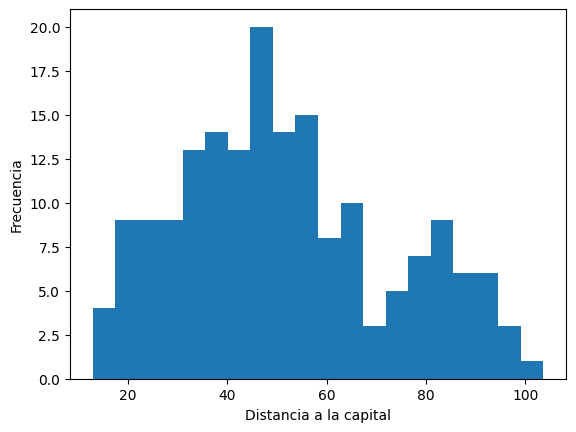


#####################################################################
EDA 3-distancia-capital.csv (excluyendo municipios de más de 35.000 habitantes)
#####################################################################
Primeros registros

  Tipo_Agrupacion  ID_Agrupacion  Nombre_Agrupacion  Valor_Agrupacion
0      Municipios             14       Acebeda (La)            88.477
1      Municipios             29            Ajalvir            34.911
2      Municipios             35  Alameda del Valle            92.242
3      Municipios             40         Alamo (El)            42.104
7      Municipios             88   Aldea del Fresno            56.001 

Número de entradas (no hay missing values)

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 178
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tipo_Agrupacion    154 non-null    object 
 1   ID_Agrupacion      154 non-null    int64  
 2

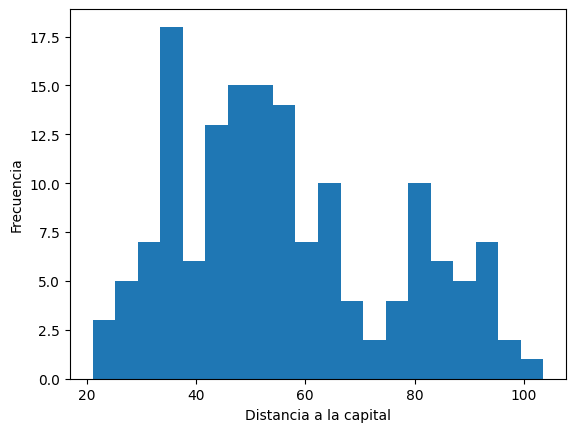

In [6]:
import matplotlib.pyplot as plt

def exploratory_analysis(df, municipios=None, xlabel='Población'):
    df = df[df['Tipo_Agrupacion'] == 'Municipios']
    df = df[df['Nombre_Agrupacion'] != 'Madrid']
    if municipios is not None:
        df = df[df['Nombre_Agrupacion'].isin(municipios)]

    print("Primeros registros\n")
    print(df.head(), "\n")

    print("Número de entradas (no hay missing values)\n")
    print(df.info(), "\n")

    print("Estadísticas\n")
    print(df['Valor_Agrupacion'].describe().apply(lambda x: int(x)), "\n")

    print("Gráfico que muestra la distribución de población \n")
    df['Valor_Agrupacion'].plot(kind='hist', bins=20).set(xlabel=xlabel,
                                                            ylabel='Frecuencia')
    plt.show()

    return df

# Análisis exploratorio de datos de "3-distancia-capital.csv"
print("#####################################################################")
print("EDA 3-distancia-capital.csv")
print("#####################################################################")
df_3 = exploratory_analysis(df_3, xlabel='Distancia a la capital')

# Análisis exploratorio de datos de "3-distancia-capital.csv", excluyendo municipios de más de 35.000 habitantes
print("\n#####################################################################")
print("EDA 3-distancia-capital.csv (excluyendo municipios de más de 35.000 habitantes)")
print("#####################################################################")
df_3_1 = exploratory_analysis(df_3_1, municipios, xlabel='Distancia a la capital')

# Clusterización de "3-distancia-capital.csv"

#####################################################################
Clusterización de 3-distancia-capital.csv (3 clústeres)
#####################################################################
Método del codo para elegir el número óptimo de clusters 



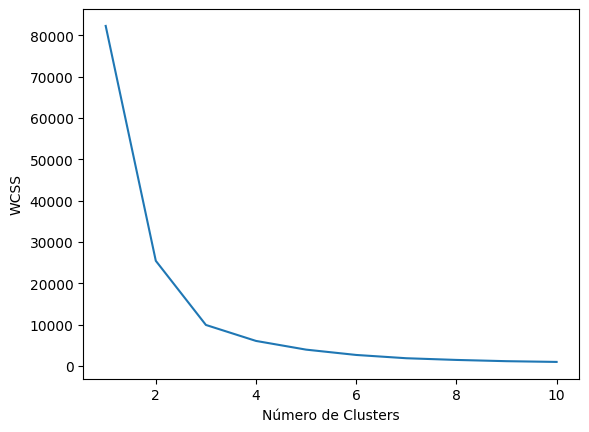


 Clusterización de municipios por densidad de población 



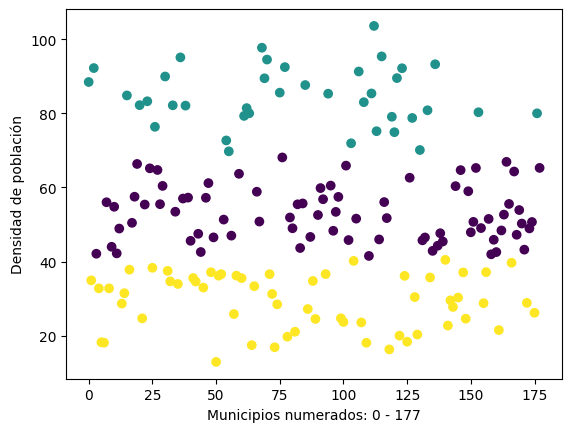


Cluster 0:
Límite inferior = 41.51
Límite superior = 68.104
Número de municipios = 79

Cluster 1:
Límite inferior = 69.753
Límite superior = 103.62
Número de municipios = 39

Cluster 2:
Límite inferior = 12.887
Límite superior = 40.449
Número de municipios = 60

#####################################################################
Clusterización de 3-distancia-capital.csv (4 clústeres)
#####################################################################
Método del codo para elegir el número óptimo de clusters 



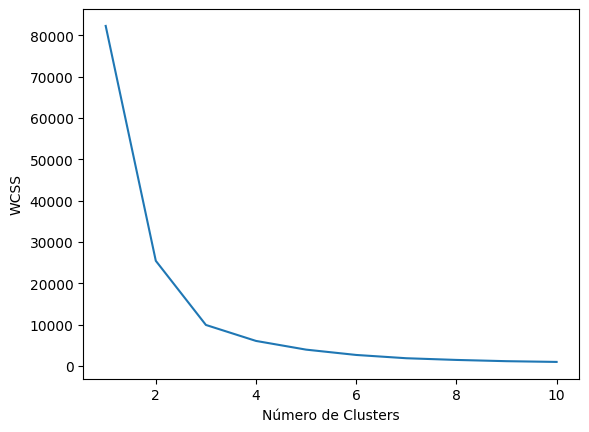


 Clusterización de municipios por densidad de población 



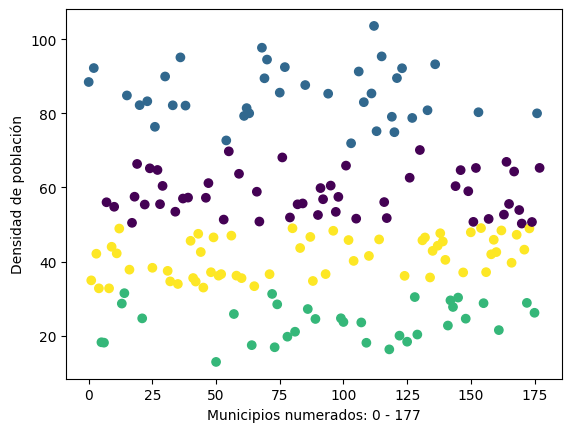


Cluster 0:
Límite inferior = 50.249
Límite superior = 70.111
Número de municipios = 50

Cluster 1:
Límite inferior = 71.93
Límite superior = 103.62
Número de municipios = 37

Cluster 2:
Límite inferior = 12.887
Límite superior = 31.45
Número de municipios = 33

Cluster 3:
Límite inferior = 32.758
Límite superior = 49.031
Número de municipios = 58

#####################################################################
Clusterización de 3-distancia-capital.csv (3 clústeres), excluyendo municipios de más de 35.000 habitantes
#####################################################################
Método del codo para elegir el número óptimo de clusters 



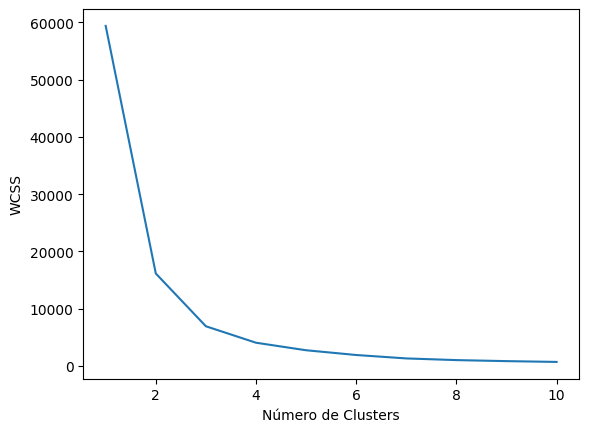


 Clusterización de municipios por densidad de población 



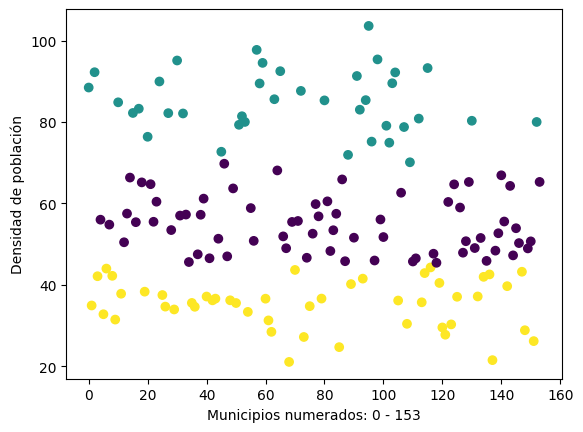


Cluster 0:
Límite inferior = 45.405
Límite superior = 69.753
Número de municipios = 68

Cluster 1:
Límite inferior = 70.111
Límite superior = 103.62
Número de municipios = 38

Cluster 2:
Límite inferior = 21.041
Límite superior = 44.268
Número de municipios = 48

#####################################################################
Clusterización de 3-distancia-capital.csv (4 clústeres), excluyendo municipios de más de 35.000 habitantes
#####################################################################
Método del codo para elegir el número óptimo de clusters 



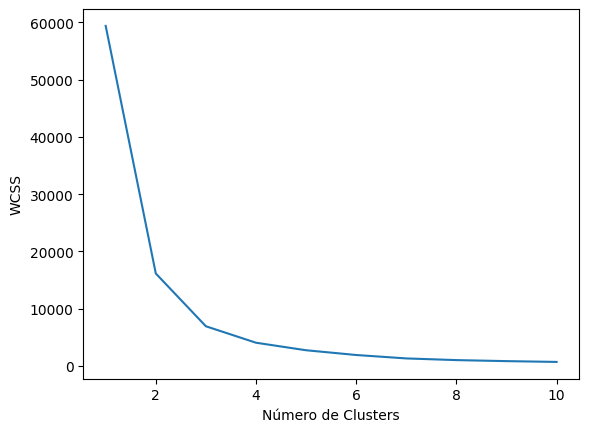


 Clusterización de municipios por densidad de población 



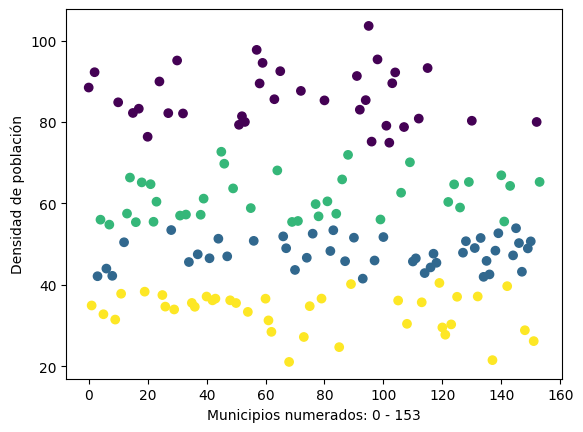


Cluster 0:
Límite inferior = 74.92
Límite superior = 103.62
Número de municipios = 35

Cluster 1:
Límite inferior = 41.51
Límite superior = 53.9
Número de municipios = 44

Cluster 2:
Límite inferior = 54.784
Límite superior = 72.696
Número de municipios = 37

Cluster 3:
Límite inferior = 21.041
Límite superior = 40.449
Número de municipios = 38



In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

def cluster_analysis(df, n_clusters):
    # X = número de habitantes de un municipio.
    X = df[['Valor_Agrupacion']].values

    # Determinar el número óptimo de clusters usando el método del codo.
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Graficar el método del codo
    print("Método del codo para elegir el número óptimo de clusters \n")
    plt.plot(range(1, 11), wcss)
    plt.xlabel('Número de Clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Seleccionar el número de clusters, y crear
    # una columna "Cluster" para clasificar cada municipio.
    df['Cluster'] = KMeans(n_clusters=n_clusters, n_init=10, random_state=0).fit_predict(X)

    # Visualización de los clusters:
    print("\n Clusterización de municipios por densidad de población \n")
    plt.scatter(range(len(df)), df['Valor_Agrupacion'], c=df['Cluster'],
                cmap='viridis')
    plt.xlabel('Municipios numerados: 0 - ' + str(len(df)-1))
    plt.ylabel('Densidad de población')
    plt.show()
    print("")

    # Calcular e imprimir información sobre los clusters.
    for i in range(n_clusters):
        cluster_data = df[df['Cluster'] == i]['Valor_Agrupacion']
        print(f"Cluster {i}:")
        print(f"Límite inferior = {np.min(cluster_data)}")
        print(f"Límite superior = {np.max(cluster_data)}")
        print(f"Número de municipios = {len(cluster_data)}")
        print("")

    return df

# Clusterización de "3-distancia-capital.csv" (3 clústeres)
print("#####################################################################")
print("Clusterización de 3-distancia-capital.csv (3 clústeres)")
print("#####################################################################")
df_distancia_3 = cluster_analysis(df_3, 3)

# Clusterización de "3-distancia-capital.csv" (4 clústeres)
print("#####################################################################")
print("Clusterización de 3-distancia-capital.csv (4 clústeres)")
print("#####################################################################")
df_distancia_4 = cluster_analysis(df_3, 4)

# Clusterización de "3-distancia-capital.csv" (3 clústeres), excluyendo municipios de más de 35.000 habitantes
print("#####################################################################")
print("Clusterización de 3-distancia-capital.csv (3 clústeres), excluyendo municipios de más de 35.000 habitantes")
print("#####################################################################")
df_distancia_max35_3 = cluster_analysis(df_3_1, 3)

# Clusterización de "3-distancia-capital.csv" (4 clústeres), excluyendo municipios de más de 35.000 habitantes
print("#####################################################################")
print("Clusterización de 3-distancia-capital.csv (4 clústeres), excluyendo municipios de más de 35.000 habitantes")
print("#####################################################################")
df_distancia_max35_4 = cluster_analysis(df_3_1, 4)

# Análisis exploratorio de datos de "4-zonas-estadisticas.csv"


 Clusterización de municipios por zonas estadísticas 



<ipython-input-8-033ab2508f4f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = le.fit_transform(df['nuts4_nombre'])


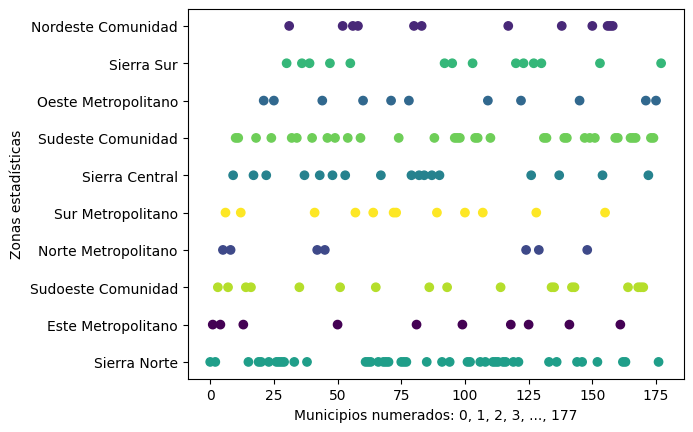


Zona estadística Este Metropolitano:
Número de municipios = 10

Zona estadística Nordeste Comunidad:
Número de municipios = 12

Zona estadística Norte Metropolitano:
Número de municipios = 7

Zona estadística Oeste Metropolitano:
Número de municipios = 11

Zona estadística Sierra Central:
Número de municipios = 17

Zona estadística Sierra Norte:
Número de municipios = 44

Zona estadística Sierra Sur:
Número de municipios = 14

Zona estadística Sudeste Comunidad:
Número de municipios = 33

Zona estadística Sudoeste Comunidad:
Número de municipios = 18

Zona estadística Sur Metropolitano:
Número de municipios = 12


 Clusterización de municipios por zonas estadísticas, excluyendo municipios de menos de 10.000 habitantes 



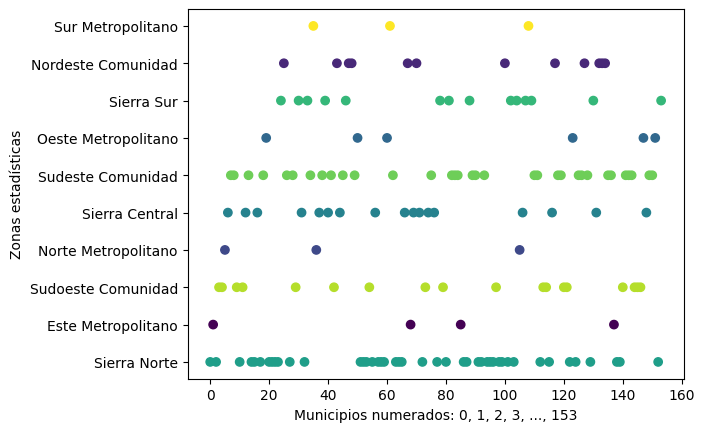


Zona estadística Este Metropolitano:
Número de municipios = 4

Zona estadística Nordeste Comunidad:
Número de municipios = 12

Zona estadística Norte Metropolitano:
Número de municipios = 3

Zona estadística Oeste Metropolitano:
Número de municipios = 6

Zona estadística Sierra Central:
Número de municipios = 17

Zona estadística Sierra Norte:
Número de municipios = 44

Zona estadística Sierra Sur:
Número de municipios = 14

Zona estadística Sudeste Comunidad:
Número de municipios = 33

Zona estadística Sudoeste Comunidad:
Número de municipios = 18

Zona estadística Sur Metropolitano:
Número de municipios = 3



In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def visualize_clusters(df):
    # Codificar los nombres de los clusters como números enteros
    le = LabelEncoder()
    df['Cluster'] = le.fit_transform(df['nuts4_nombre'])

    # Visualización de los clusters:
    plt.scatter(range(len(df)), df['nuts4_nombre'], c=df['Cluster'],
                cmap='viridis')
    plt.xlabel('Municipios numerados: 0, 1, 2, 3, ..., ' + str(len(df)-1))
    plt.ylabel('Zonas estadísticas')
    plt.show()
    print("")

    # Imprimir el número de municipios que forman parte de cada zona estadística
    for i in range(len(df['Cluster'].unique())):
        cluster_data = df[df['Cluster'] == i]['Nombre_Agrupacion']
        print(f"Zona estadística {le.inverse_transform([i])[0]}:")
        print(f"Número de municipios = {len(cluster_data)}")
        print("")

    return df

# Visualización de clusters de "4-zonas-estadisticas.csv"
df_4 = df_4[df_4['Nombre_Agrupacion'] != 'Madrid']
print("\n Clusterización de municipios por zonas estadísticas \n")
df_4 = visualize_clusters(df_4)

# Visualización de clusters de "4-zonas-estadisticas.csv", excluyendo municipios de menos de 10.000 habitantes
df_4_1 = df_4_1[df_4_1['Nombre_Agrupacion'] != 'Madrid']
df_4_1 = df_4_1[df_4_1['Nombre_Agrupacion'].isin(municipios)]
print("\n Clusterización de municipios por zonas estadísticas, excluyendo municipios de menos de 10.000 habitantes \n")
df_4_1 = visualize_clusters(df_4_1)


# Exportar csv clusterizados

In [9]:
base_path = '/content/drive/My Drive/Colab Notebooks/checkpoint_1/'

df_poblacion_4.to_csv(base_path + '1-poblacion-cluster.csv', sep=';', encoding='utf-8')
df_poblacion_max35_3.to_csv(base_path + '1-poblacion-35-cluster.csv', sep=';', encoding='utf-8')

df_densidad_4.to_csv(base_path + '2-densidad-cluster.csv', sep=';', encoding='utf-8')
df_densidad_max35_3.to_csv(base_path + '2-densidad-35-cluster.csv', sep=';', encoding='utf-8')

df_distancia_4.to_csv(base_path + '3-distancia-cluster.csv', sep=';', encoding='utf-8')
df_distancia_max35_3.to_csv(base_path + '3-distancia-35-cluster.csv', sep=';', encoding='utf-8')
